In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error


F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_excel('E:/postgraduate/案例选题数据及说明/美小麦连续1.xlsx')

In [3]:
data['时间'] = data['时间'].str.split(',').str[0]
data.index = data['时间']
data = data[['时间','开盘','最高','最低','收盘','总手']]
data.head()

,时间,开盘,最高,最低,收盘,总手
时间,,,,,,
2021-01-12,2021-01-12,636.25,670.00,634.00,664.75,76800
2021-01-13,2021-01-13,665.00,680.75,656.25,659.25,76421
2021-01-14,2021-01-14,660.00,673.25,653.00,670.50,57699
2021-01-15,2021-01-15,671.00,693.00,664.50,674.75,75385
2021-01-19,2021-01-19,683.75,691.25,668.75,673.25,61713


In [4]:
data1 = data[['开盘','最高','最低','收盘','总手']]
data1.head()

,开盘,最高,最低,收盘,总手
时间,,,,,
2021-01-12,636.25,670.00,634.00,664.75,76800
2021-01-13,665.00,680.75,656.25,659.25,76421
2021-01-14,660.00,673.25,653.00,670.50,57699
2021-01-15,671.00,693.00,664.50,674.75,75385
2021-01-19,683.75,691.25,668.75,673.25,61713


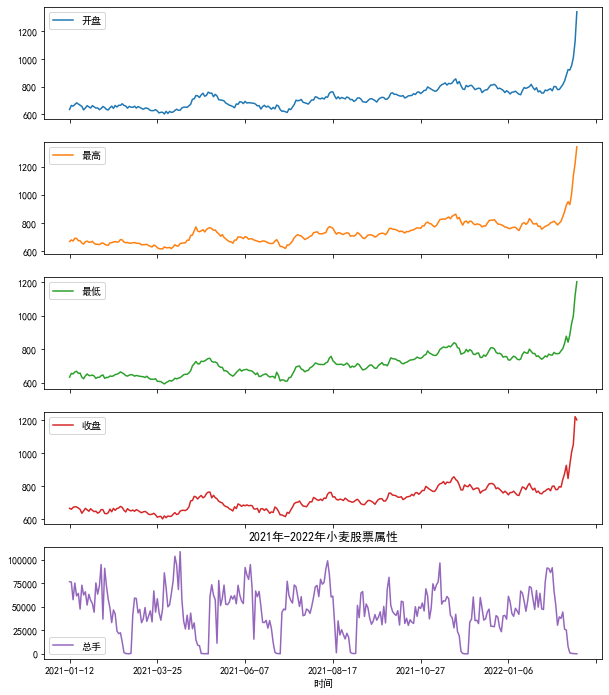

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']
data1.plot(subplots = True,figsize = (10,12))
plt.title('2021年-2022年小麦股票属性')
#plt.savefig('stocks.png')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['收盘'],autolag = 'AIC')
print('result is \n{}'.format(result))

result1 = pd.Series(result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for k,v in result[4].items():
    result1['Critical Value (%s)' % k] = v
result1['The maximized information criterion of autolag is not None'] = result[5]
print('\nresult_format is \n{}'.format(result1))

print('\n\n==== adfuller()的回归模型系数 ====')
[t,p,c,r] = adfuller(x = data['收盘'],regression = 'ctt',regresults = True)

print('r.resols.summary() is')
print(r.resols.summary())

print('\nr.resols.params are')
print(r.resols.params)

result is 
(0.9182763367111954, 0.9933242617841007, 7, 282, {'1%': -3.4537536300652, '5%': -2.8718443180148836, '10%': -2.572260641818822}, 2374.5175928661906)

result_format is 
Test Statistic                                                   0.918276
p-value                                                          0.993324
Lags Used                                                        7.000000
Number of Observations Used                                    282.000000
Critical Value (1%)                                             -3.453754
Critical Value (5%)                                             -2.871844
Critical Value (10%)                                            -2.572261
The maximized information criterion of autolag is not None    2374.517593
dtype: float64


==== adfuller()的回归模型系数 ====
r.resols.summary() is
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Mode

In [27]:
diff1 = data['收盘'].diff(1).dropna()
adftest_diff1 = adfuller(diff1,autolag = 'AIC')
print(('diff1 result is \n{}'.format(adftest_diff1)))

diff1 result is 
(-1.7525443886809362, 0.40426335311343636, 6, 282, {'1%': -3.4537536300652, '5%': -2.8718443180148836, '10%': -2.572260641818822}, 2365.6463224622153)


In [29]:
diff3 = data['收盘'].diff(3).dropna()
adftest_diff3 = adfuller(diff3,autolag = 'AIC')
print(('diff3 result is \n{}'.format(adftest_diff3)))

diff3 result is 
(-1.101219176630781, 0.714585466785842, 16, 270, {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}, 2373.920954288946)


<Figure size 1080x144 with 0 Axes>

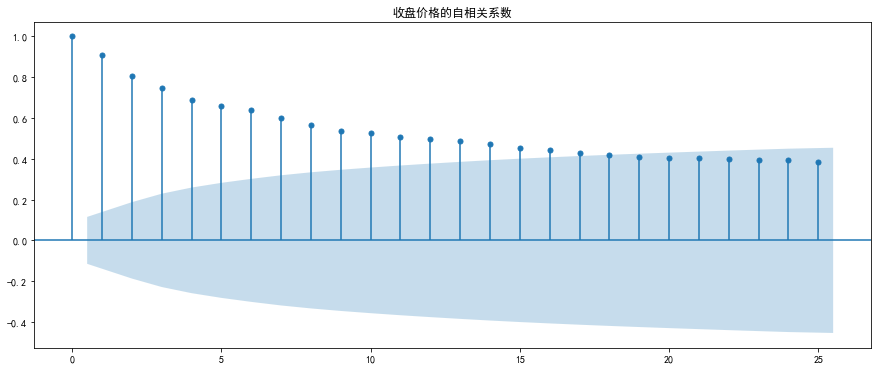

In [14]:
# Autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['axes.unicode_minus'] = False
plot_acf(data1["收盘"],title="收盘价格的自相关系数")
plt.show()

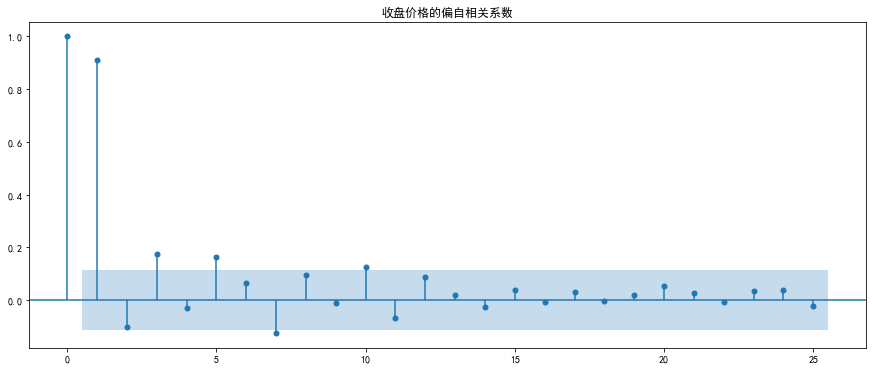

In [15]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(data1['收盘'],title = '收盘价格的偏自相关系数')
plt.show()

<AxesSubplot:xlabel='时间'>

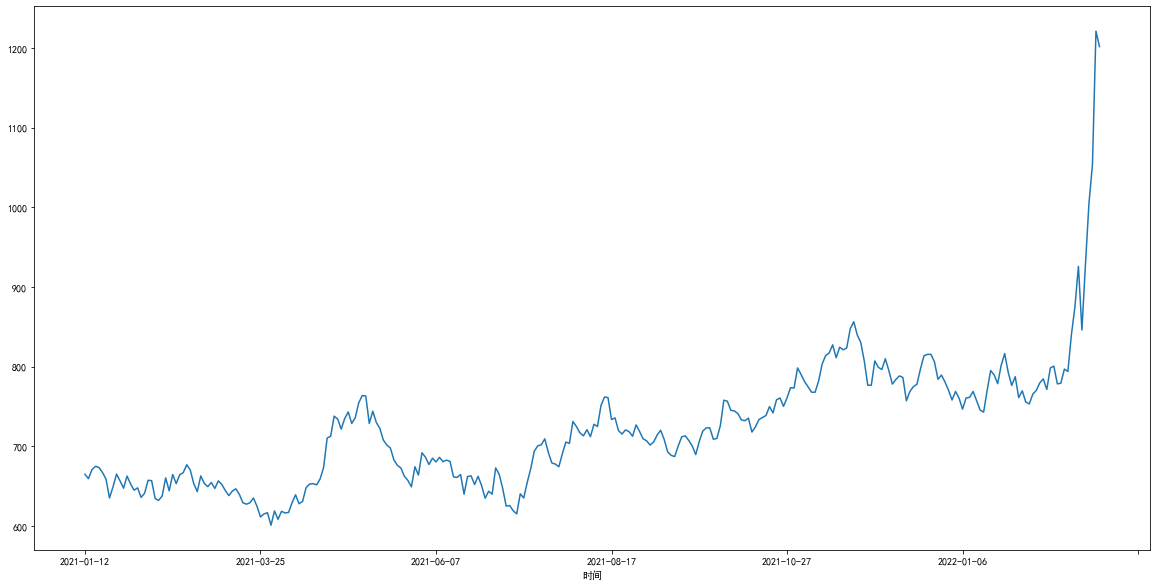

In [16]:
data1['收盘'].plot(figsize=(20,10))

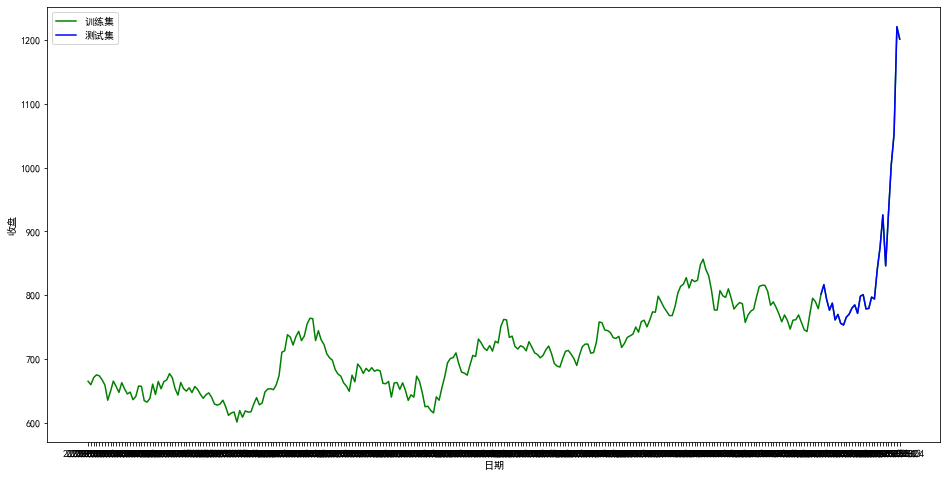

In [18]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.xlabel('日期')
plt.ylabel('收盘')
plt.plot(data['收盘'], 'green', label='训练集')
plt.plot(test_data['收盘'], 'blue', label='测试集')
plt.legend()

F:\anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
F:\anaconda\lib\

Lag: 15
MSE: 2176.6400724987266
MAE: 30.87914625714209
RMSE: 46.65447537480972


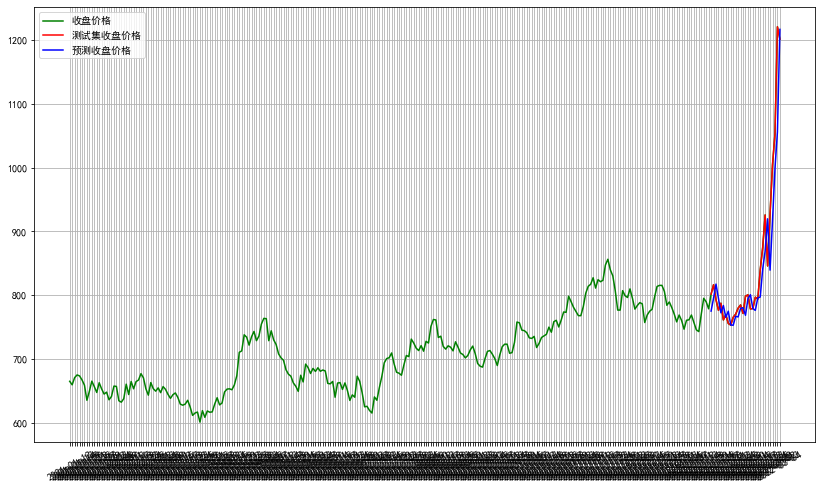

In [35]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train_ar = train_data['收盘']
test_ar = test_data['收盘']
# train autoregression
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
    
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-600:], data['收盘'].tail(600), color='green', label='收盘价格')
plt.plot(test_data.index, test_data['收盘'], color='red', label='测试集收盘价格')
plt.plot(test_data.index, predictions, color='blue', label='预测收盘价格')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data['收盘'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['收盘'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['收盘'], predictions))
print('RMSE: '+str(rmse))


<ipython-input-32-0514e19997e1>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)


<Figure size 1152x576 with 0 Axes>

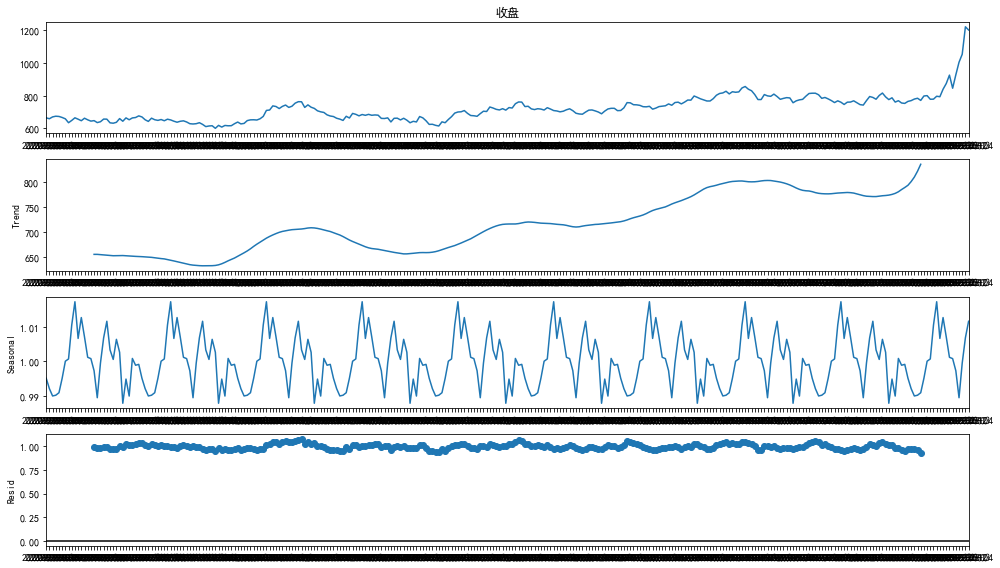

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['收盘']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [33]:
train_arima = train_data['收盘']
test_arima = test_data['收盘']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

F:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE: 2168.938171212163
MAE: 30.850304538319417
RMSE: 46.57186029365977


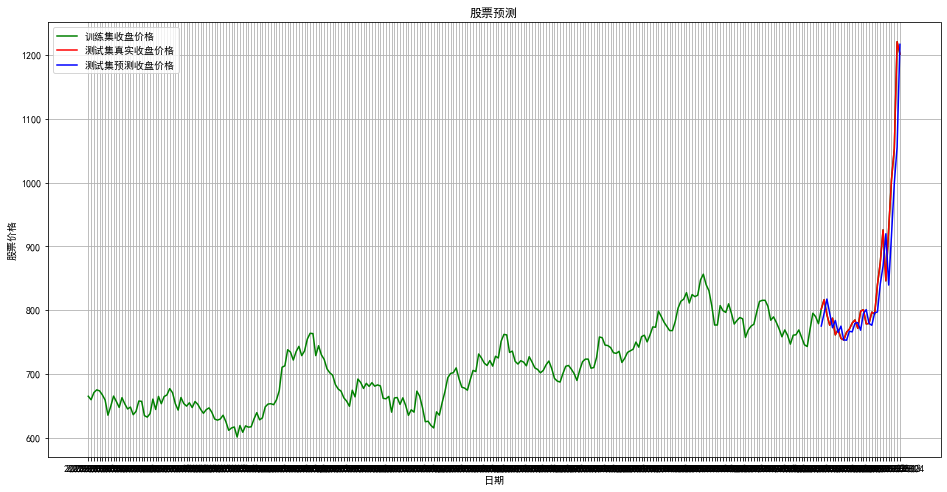

In [36]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['收盘'].tail(600), color='green', label = '训练集收盘价格')
plt.plot(test_data.index, y, color = 'red', label = '测试集真实收盘价格')
plt.plot(test_data.index, predictions, color = 'blue', label = '测试集预测收盘价格')
plt.title('股票预测')
plt.xlabel('日期')
plt.ylabel('股票价格')
plt.legend()
plt.grid(True)
plt.show()